Q.Basic life cycle of data science project?

ANSWER: 1. Business problem understanding
        2. Data Collection
        3. Data cleaning and processing
        4. Exploratory data analysis & visualization
        5. Model building 
        6. Model evaluation
        7. Model deployment. 
      These are 7 steps of data science project. These steps should be performed in above order.
In detail, First we should have clear idea about what the given business problem is. After understanding the problem      collect the data from given sources. Once you get the data, clean it and get the detailed analysis of data according business problem. After visualizing the data, build the appropriate models and check out the accuracy.                   
Whichever gives highest accuracy that will be the final model. After finalizing model deploy it.

### EDA of Covid-19 Data


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

In [26]:
data = pd.read_csv('df_covid19_countries.csv')
data.head()

location        date  total_cases  new_cases  new_cases_smoothed  \
0  Afghanistan  2020-02-24          5.0        5.0                 0.0   
1  Afghanistan  2020-02-25          5.0        0.0                 0.0   
2  Afghanistan  2020-02-26          5.0        0.0                 0.0   
3  Afghanistan  2020-02-27          5.0        0.0                 0.0   
4  Afghanistan  2020-02-28          5.0        0.0                 0.0   

   total_deaths  new_deaths  new_deaths_smoothed  reproduction_rate  \
0           0.0         0.0                  0.0                0.0   
1           0.0         0.0                  0.0                0.0   
2           0.0         0.0                  0.0                0.0   
3           0.0         0.0                  0.0                0.0   
4           0.0         0.0                  0.0                0.0   

   total_vaccinations  people_vaccinated  people_fully_vaccinated  \
0                 0.0                0.0                      0.0   
1                 0.0                0.0                      0.0   
2                 0.0                0.0                      0.0   
3                 0.0                0.0                      0.0   
4                 0.0                0.0                      0.0   

   total_boosters  population  vaccination_ratio  prevalence  incidence  
0             0.0  41128772.0                0.0    0.000012   0.000012  
1             0.0  41128772.0                0.0    0.000012   0.000000  
2             0.0  41128772.0                0.0    0.000012   0.000000  
3             0.0  41128772.0                0.0    0.000012   0.000000  
4             0.0  41128772.0                0.0    0.000012   0.000000

In [27]:
data.shape

(234802, 17)

In [28]:
data.describe()

total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  2.348020e+05  2.348020e+05       234802.000000  2.348020e+05   
mean   1.180986e+06  2.871597e+03         2862.145891  1.698854e+04   
std    5.247207e+06  1.746037e+04        16125.352068  7.064676e+04   
min    0.000000e+00  0.000000e+00            0.000000  0.000000e+00   
25%    2.389000e+03  0.000000e+00            1.857000  2.500000e+01   
50%    3.472200e+04  2.000000e+01           47.857000  4.720000e+02   
75%    3.767355e+05  5.130000e+02          640.714000  5.707000e+03   
max    1.010440e+08  1.355241e+06       806904.857000  1.095235e+06   

          new_deaths  new_deaths_smoothed  reproduction_rate  \
count  234802.000000         234802.00000      234802.000000   
mean       28.458586             28.39477           0.711076   
std       151.755632            142.70809           0.517298   
min         0.000000              0.00000          -0.080000   
25%         0.000000              0.00000           0.040000   
50%         0.000000              0.42900           0.840000   
75%         5.000000              6.85700           1.080000   
max      4529.000000           4190.00000           5.820000   

       total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count        2.348020e+05       2.348020e+05             2.348020e+05   
mean         1.982706e+07       6.347938e+06             5.288981e+06   
std          1.713780e+08       4.959491e+07             4.305914e+07   
min          0.000000e+00       0.000000e+00             0.000000e+00   
25%          0.000000e+00       0.000000e+00             0.000000e+00   
50%          0.000000e+00       0.000000e+00             0.000000e+00   
75%          4.818375e+04       0.000000e+00             0.000000e+00   
max          3.479607e+09       1.307222e+09             1.274018e+09   

       total_boosters    population  vaccination_ratio     prevalence  \
count    2.348020e+05  2.348020e+05      234802.000000  234802.000000   
mean     1.628078e+06  3.643463e+07          12.415381       6.506534   
std      1.291695e+07  1.408715e+08          26.186637      11.693599   
min      0.000000e+00  4.700000e+01           0.000000       0.000000   
25%      0.000000e+00  7.242720e+05           0.000000       0.073698   
50%      0.000000e+00  6.336393e+06           0.000000       0.884724   
75%      0.000000e+00  2.620798e+07           0.000000       7.629241   
max      8.157180e+08  1.425887e+09         129.066316      70.435945   

           incidence  
count  234802.000000  
mean        0.022642  
std         0.161368  
min         0.000000  
25%         0.000000  
50%         0.000274  
75%         0.007739  
max        32.441022

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234802 entries, 0 to 234801
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   location                 234802 non-null  object 
 1   date                     234802 non-null  object 
 2   total_cases              234802 non-null  float64
 3   new_cases                234802 non-null  float64
 4   new_cases_smoothed       234802 non-null  float64
 5   total_deaths             234802 non-null  float64
 6   new_deaths               234802 non-null  float64
 7   new_deaths_smoothed      234802 non-null  float64
 8   reproduction_rate        234802 non-null  float64
 9   total_vaccinations       234802 non-null  float64
 10  people_vaccinated        234802 non-null  float64
 11  people_fully_vaccinated  234802 non-null  float64
 12  total_boosters           234802 non-null  float64
 13  population               234802 non-null  float64
 14  vacc

In [30]:
data.isna().sum()

location                   0
date                       0
total_cases                0
new_cases                  0
new_cases_smoothed         0
total_deaths               0
new_deaths                 0
new_deaths_smoothed        0
reproduction_rate          0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
total_boosters             0
population                 0
vaccination_ratio          0
prevalence                 0
incidence                  0
dtype: int64

#### No missing value found.

In [31]:
data.duplicated().sum()

0

#### No duplicated values are present.

In [32]:
data.dtypes

location                    object
date                        object
total_cases                float64
new_cases                  float64
new_cases_smoothed         float64
total_deaths               float64
new_deaths                 float64
new_deaths_smoothed        float64
reproduction_rate          float64
total_vaccinations         float64
people_vaccinated          float64
people_fully_vaccinated    float64
total_boosters             float64
population                 float64
vaccination_ratio          float64
prevalence                 float64
incidence                  float64
dtype: object

#### All columns are float type except location and date. Location is object type. Date is showing object type, so will change that type

In [33]:
data['date'] = pd.to_datetime(data['date'])

In [34]:
data.dtypes

location                           object
date                       datetime64[ns]
total_cases                       float64
new_cases                         float64
new_cases_smoothed                float64
total_deaths                      float64
new_deaths                        float64
new_deaths_smoothed               float64
reproduction_rate                 float64
total_vaccinations                float64
people_vaccinated                 float64
people_fully_vaccinated           float64
total_boosters                    float64
population                        float64
vaccination_ratio                 float64
prevalence                        float64
incidence                         float64
dtype: object

#### Converted datatype of date to datetime.

In [35]:
data.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 

In [36]:
data.location.unique().shape

(236,)

#### There are 236 countries present in the given dataset

In [44]:
df= data.groupby('location').max()
df.reset_index(inplace=True)
df.head()

location       date  total_cases  new_cases  new_cases_smoothed  \
0  Afghanistan 2023-01-04     207715.0     3243.0            2095.571   
1      Albania 2023-01-04     333818.0     4789.0            2290.714   
2      Algeria 2023-01-04     271236.0     2521.0            2177.571   
3      Andorra 2023-01-04      47751.0     2313.0             734.286   
4       Angola 2023-01-04     105095.0     5035.0            1716.000   

   total_deaths  new_deaths  new_deaths_smoothed  reproduction_rate  \
0        7850.0       159.0               97.571               1.61   
1        3596.0        21.0               20.429               1.89   
2        6881.0        49.0               38.286               1.79   
3         165.0         7.0                2.000               1.63   
4        1930.0        30.0               16.143               2.94   

   total_vaccinations  people_vaccinated  people_fully_vaccinated  \
0          12449870.0         11459692.0               10754839.0   
1           3025728.0          1342243.0                1270016.0   
2          15267442.0          7840131.0                6481186.0   
3            154367.0            57901.0                  53485.0   
4          23701049.0         14990131.0                8253873.0   

   total_boosters  population  vaccination_ratio  prevalence  incidence  
0             0.0  41128772.0          27.862957    0.505036   0.007904  
1        377057.0   2842318.0          47.223534   11.744569   0.182603  
2        575651.0  44903228.0          17.460061    0.604046   0.005645  
3         42981.0     79843.0          72.518568   59.806120   4.854960  
4       1457126.0  35588996.0          42.120129    0.295302   0.014178

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 236 non-null    object        
 1   date                     236 non-null    datetime64[ns]
 2   total_cases              236 non-null    float64       
 3   new_cases                236 non-null    float64       
 4   new_cases_smoothed       236 non-null    float64       
 5   total_deaths             236 non-null    float64       
 6   new_deaths               236 non-null    float64       
 7   new_deaths_smoothed      236 non-null    float64       
 8   reproduction_rate        236 non-null    float64       
 9   total_vaccinations       236 non-null    float64       
 10  people_vaccinated        236 non-null    float64       
 11  people_fully_vaccinated  236 non-null    float64       
 12  total_boosters           236 non-nul

In [46]:
df.describe()

total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  2.360000e+02  2.360000e+02          236.000000  2.360000e+02   
mean   2.863696e+06  4.434557e+04        25511.857725  2.847717e+04   
std    9.195187e+06  1.277387e+05        77771.620747  1.011567e+05   
min    0.000000e+00  0.000000e+00            0.000000  0.000000e+00   
25%    1.822250e+04  8.835000e+02          289.929000  1.440000e+02   
50%    1.859860e+05  4.299000e+03         1911.071500  1.947500e+03   
75%    1.290520e+06  2.565375e+04        11542.321250  1.413900e+04   
max    1.010440e+08  1.355241e+06       806904.857000  1.095235e+06   

        new_deaths  new_deaths_smoothed  reproduction_rate  \
count   236.000000           236.000000         236.000000   
mean    266.961864           158.386203           1.730254   
std     646.683522           464.184635           1.035009   
min       0.000000             0.000000           0.000000   
25%       7.000000             2.857000           1.357500   
50%      39.000000            16.429000           1.805000   
75%     211.000000            97.714000           2.370000   
max    4529.000000          4190.000000           5.820000   

       total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count        2.360000e+02       2.360000e+02             2.360000e+02   
mean         5.690180e+07       2.370758e+07             2.176967e+07   
std          2.763988e+08       1.116474e+08             1.061558e+08   
min          0.000000e+00       0.000000e+00             0.000000e+00   
25%          5.007338e+05       2.638270e+05             2.197315e+05   
50%          4.503121e+06       2.593453e+06             2.332402e+06   
75%          2.228456e+07       1.060956e+07             8.955004e+06   
max          3.479607e+09       1.307222e+09             1.274018e+09   

       total_boosters    population  vaccination_ratio  prevalence   incidence  
count    2.360000e+02  2.360000e+02         236.000000  236.000000  236.000000  
mean     1.176664e+07  3.427047e+07          58.596167   17.318780    1.157118  
std      5.791644e+07  1.361864e+08          27.947951   18.984515    3.411726  
min      0.000000e+00  4.700000e+01           0.000000    0.000000    0.000000  
25%      1.539650e+04  5.653270e+05          40.473693    0.626485    0.018572  
50%      4.526590e+05  5.608085e+06          65.237295   10.171777    0.187678  
75%      4.347809e+06  2.297867e+07          80.015762   29.576032    0.947495  
max      8.157180e+08  1.425887e+09         129.066316   70.435945   32.441022

In [47]:
df[df.location == 'India']

location       date  total_cases  new_cases  new_cases_smoothed  \
93    India 2023-01-04   44680543.0   414188.0            391232.0   

    total_deaths  new_deaths  new_deaths_smoothed  reproduction_rate  \
93      530710.0      4529.0               4190.0               2.67   

    total_vaccinations  people_vaccinated  people_fully_vaccinated  \
93        2.201153e+09       1.027213e+09              951234968.0   

    total_boosters    population  vaccination_ratio  prevalence  incidence  
93     222704735.0  1.417173e+09          72.483244    3.152794   0.029676

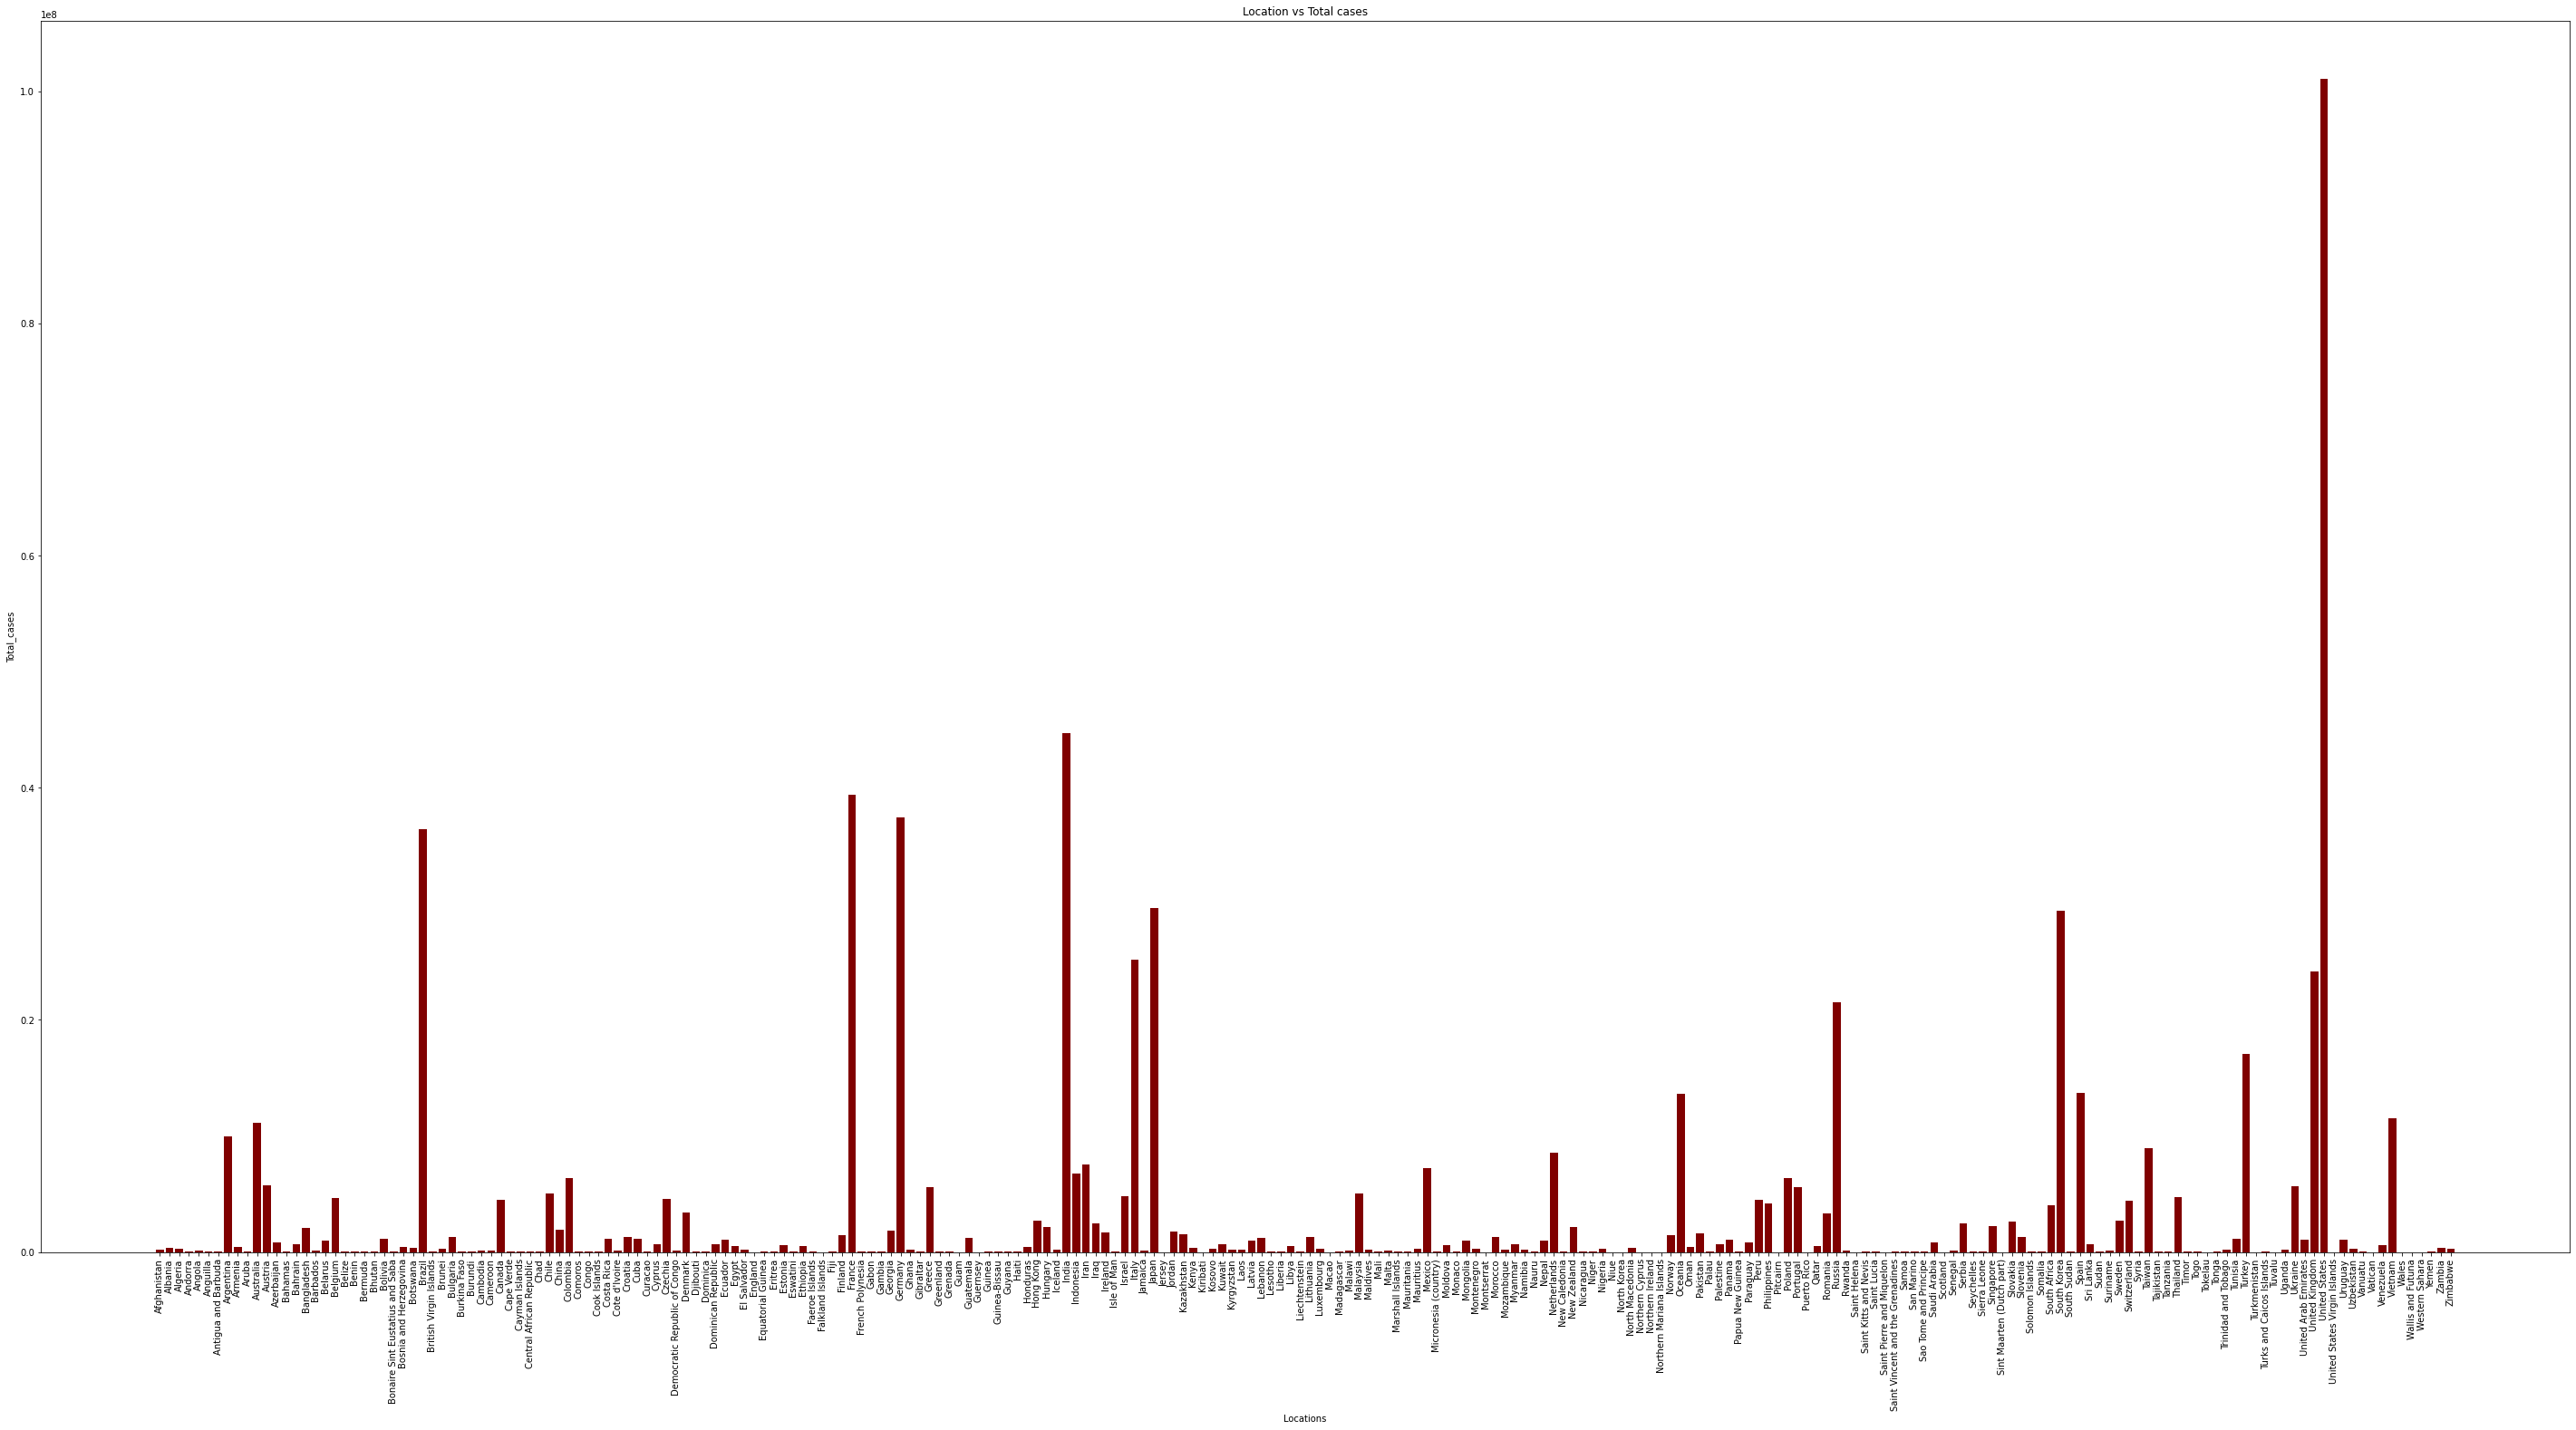

<Figure size 432x288 with 0 Axes>

In [48]:
plt.figure(figsize=(50,25))
plt.bar(df.location,df.total_cases,color='maroon')
plt.xticks(rotation=90)
plt.xlabel('Locations')
plt.ylabel('Total_cases')
plt.title('Location vs Total cases')
plt.show()
plt.savefig('bar_plot.png')

In [23]:
Faulty_data = data[data.total_deaths > data.total_cases]
Faulty_data

location       date  total_cases  new_cases  new_cases_smoothed  \
153097     North Korea 2022-05-14          1.0        1.0                 0.0   
153098     North Korea 2022-05-15          1.0        0.0                 0.0   
153099     North Korea 2022-05-16          1.0        0.0                 0.0   
153100     North Korea 2022-05-17          1.0        0.0                 0.0   
153101     North Korea 2022-05-18          1.0        0.0                 0.0   
...                ...        ...          ...        ...                 ...   
153330     North Korea 2023-01-02          1.0        0.0                 0.0   
153331     North Korea 2023-01-03          1.0        0.0                 0.0   
153332     North Korea 2023-01-04          1.0        0.0                 0.0   
200001           Sudan 2020-03-13          0.0        0.0                 0.0   
220998  United Kingdom 2020-01-30          0.0        0.0                 0.0   

        total_deaths  new_deaths  new_deaths_smoothed  reproduction_rate  \
153097           6.0         6.0                  0.0                0.0   
153098           6.0         0.0                  0.0                0.0   
153099           6.0         0.0                  0.0                0.0   
153100           6.0         0.0                  0.0                0.0   
153101           6.0         0.0                  0.0                0.0   
...              ...         ...                  ...                ...   
153330           6.0         0.0                  0.0                0.0   
153331           6.0         0.0                  0.0                0.0   
153332           6.0         0.0                  0.0                0.0   
200001           1.0         1.0                  0.0                0.0   
220998           1.0         1.0                  0.0                0.0   

        total_vaccinations  people_vaccinated  people_fully_vaccinated  \
153097                 0.0                0.0                      0.0   
153098                 0.0                0.0                      0.0   
153099                 0.0                0.0                      0.0   
153100                 0.0                0.0                      0.0   
153101                 0.0                0.0                      0.0   
...                    ...                ...                      ...   
153330                 0.0                0.0                      0.0   
153331                 0.0                0.0                      0.0   
153332                 0.0                0.0                      0.0   
200001                 0.0                0.0                      0.0   
220998                 0.0                0.0                      0.0   

        total_boosters  population  vaccination_ratio  prevalence  incidence  
153097             0.0  26069416.0                0.0    0.000004   0.000004  
153098             0.0  26069416.0                0.0    0.000004   0.000000  
153099             0.0  26069416.0                0.0    0.000004   0.000000  
153100             0.0  26069416.0                0.0    0.000004   0.000000  
153101             0.0  26069416.0                0.0    0.000004   0.000000  
...                ...         ...                ...         ...        ...  
153330             0.0  26069416.0                0.0    0.000004   0.000000  
153331             0.0  26069416.0                0.0    0.000004   0.000000  
153332             0.0  26069416.0                0.0    0.000004   0.000000  
200001             0.0  46874200.0                0.0    0.000000   0.000000  
220998             0.0  67508936.0                0.0    0.000000   0.000000  

[238 rows x 17 columns]

In [24]:
Faulty_data.location.unique()

array(['North Korea', 'Sudan', 'United Kingdom'], dtype=object)

##### In North Korea   total deaths are greater than total cases. Which is not possible

In [20]:
Faulty_data[Faulty_data.location == 'North Korea'].count()

location                   1
date                       1
total_cases                1
new_cases                  1
new_cases_smoothed         1
total_deaths               1
new_deaths                 1
new_deaths_smoothed        1
reproduction_rate          1
total_vaccinations         1
people_vaccinated          1
people_fully_vaccinated    1
total_boosters             1
population                 1
vaccination_ratio          1
prevalence                 1
incidence                  1
dtype: int64

In [21]:
data[data.location == 'North Korea'].count()

location                   965
date                       965
total_cases                965
new_cases                  965
new_cases_smoothed         965
total_deaths               965
new_deaths                 965
new_deaths_smoothed        965
reproduction_rate          965
total_vaccinations         965
people_vaccinated          965
people_fully_vaccinated    965
total_boosters             965
population                 965
vaccination_ratio          965
prevalence                 965
incidence                  965
dtype: int64

In [22]:
Zero_covid_cases = df[df.total_cases ==0.0]
Zero_covid_cases

location       date  total_cases  new_cases  \
61                        England 2022-12-21          0.0        0.0   
82                           Guam 2022-06-18          0.0        0.0   
84                       Guernsey 2022-12-19          0.0        0.0   
103                        Jersey 2022-12-25          0.0        0.0   
149                          Niue 2022-10-18          0.0        0.0   
152               Northern Cyprus 2023-01-04          0.0        0.0   
153              Northern Ireland 2022-12-21          0.0        0.0   
154      Northern Mariana Islands 2021-12-04          0.0        0.0   
166                      Pitcairn 2022-08-29          0.0        0.0   
169                   Puerto Rico 2022-06-18          0.0        0.0   
183                      Scotland 2022-12-19          0.0        0.0   
189     Sint Maarten (Dutch part) 2022-11-04          0.0        0.0   
210                       Tokelau 2022-12-05          0.0        0.0   
215                  Turkmenistan 2022-09-04          0.0        0.0   
223  United States Virgin Islands 2022-06-19          0.0        0.0   
230                         Wales 2022-12-20          0.0        0.0   
232                Western Sahara 2022-04-20          0.0        0.0   

     new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
61                  0.0           0.0         0.0                  0.0   
82                  0.0           0.0         0.0                  0.0   
84                  0.0           0.0         0.0                  0.0   
103                 0.0           0.0         0.0                  0.0   
149                 0.0           0.0         0.0                  0.0   
152                 0.0           0.0         0.0                  0.0   
153                 0.0           0.0         0.0                  0.0   
154                 0.0           0.0         0.0                  0.0   
166                 0.0           0.0         0.0                  0.0   
169                 0.0           0.0         0.0                  0.0   
183                 0.0           0.0         0.0                  0.0   
189                 0.0           0.0         0.0                  0.0   
210                 0.0           0.0         0.0                  0.0   
215                 0.0           0.0         0.0                  0.0   
223                 0.0           0.0         0.0                  0.0   
230                 0.0           0.0         0.0                  0.0   
232                 0.0           0.0         0.0                  0.0   

     reproduction_rate  total_vaccinations  people_vaccinated  \
61                 0.0         144153933.0         45374671.0   
82                 0.0                 0.0                0.0   
84                 0.0            178525.0            54223.0   
103                0.0            266239.0            84338.0   
149                0.0              4920.0             1636.0   
152                0.0            861519.0           301673.0   
153                0.0           4466163.0          1429764.0   
154                0.0                 0.0                0.0   
166                0.0               117.0               47.0   
169                0.0                 0.0                0.0   
183                0.0          13014285.0          4549556.0   
189                0.0             65515.0            29788.0   
210                0.0              5374.0             2203.0   
215                0.0          13514000.0          3728000.0   
223                0.0                 0.0                0.0   
230                0.0           8549137.0          2591005.0   
232                0.0                 0.0                0.0   

     people_fully_vaccinated  total_boosters  population  vaccination_ratio  \
61                42878848.0      63562222.0  56550000.0          80.238145   
82                       0.0             0.0    171783.0          

In [23]:
print(Zero_covid_cases.location.unique().shape)
print(Zero_covid_cases.location.unique())

(17,)
['England' 'Guam' 'Guernsey' 'Jersey' 'Niue' 'Northern Cyprus'
 'Northern Ireland' 'Northern Mariana Islands' 'Pitcairn' 'Puerto Rico'
 'Scotland' 'Sint Maarten (Dutch part)' 'Tokelau' 'Turkmenistan'
 'United States Virgin Islands' 'Wales' 'Western Sahara']


#### Above are the 17 countries where no covid cases at all.

In [24]:
 Not_vaccinated_at_all = df[df.people_vaccinated ==0.0]

In [25]:
 Not_vaccinated_at_all.location.unique()

array(['Eritrea', 'Guam', 'Marshall Islands', 'Micronesia (country)',
       'North Korea', 'Northern Mariana Islands', 'Palau', 'Puerto Rico',
       'Saint Pierre and Miquelon', 'United States Virgin Islands',
       'Vatican', 'Western Sahara'], dtype=object)

In [26]:
 Not_vaccinated_at_all.location.unique().shape

(12,)

#### Above are the 12 countries where no one is vaccinated.

In [27]:
total_population= data.groupby('location').agg({'population':max})
total_population

population
location                     
Afghanistan        41128772.0
Albania             2842318.0
Algeria            44903228.0
Andorra               79843.0
Angola             35588996.0
...                       ...
Wallis and Futuna     11596.0
Western Sahara       576005.0
Yemen              33696612.0
Zambia             20017670.0
Zimbabwe           16320539.0

[236 rows x 1 columns]

In [28]:
Total_covid_cases= data.groupby('location').agg({'total_cases':max})
Total_covid_cases.reset_index(inplace=True)
Total_covid_cases

location  total_cases
0          Afghanistan     207715.0
1              Albania     333818.0
2              Algeria     271236.0
3              Andorra      47751.0
4               Angola     105095.0
..                 ...          ...
231  Wallis and Futuna       3427.0
232     Western Sahara          0.0
233              Yemen      11945.0
234             Zambia     334886.0
235           Zimbabwe     259981.0

[236 rows x 2 columns]

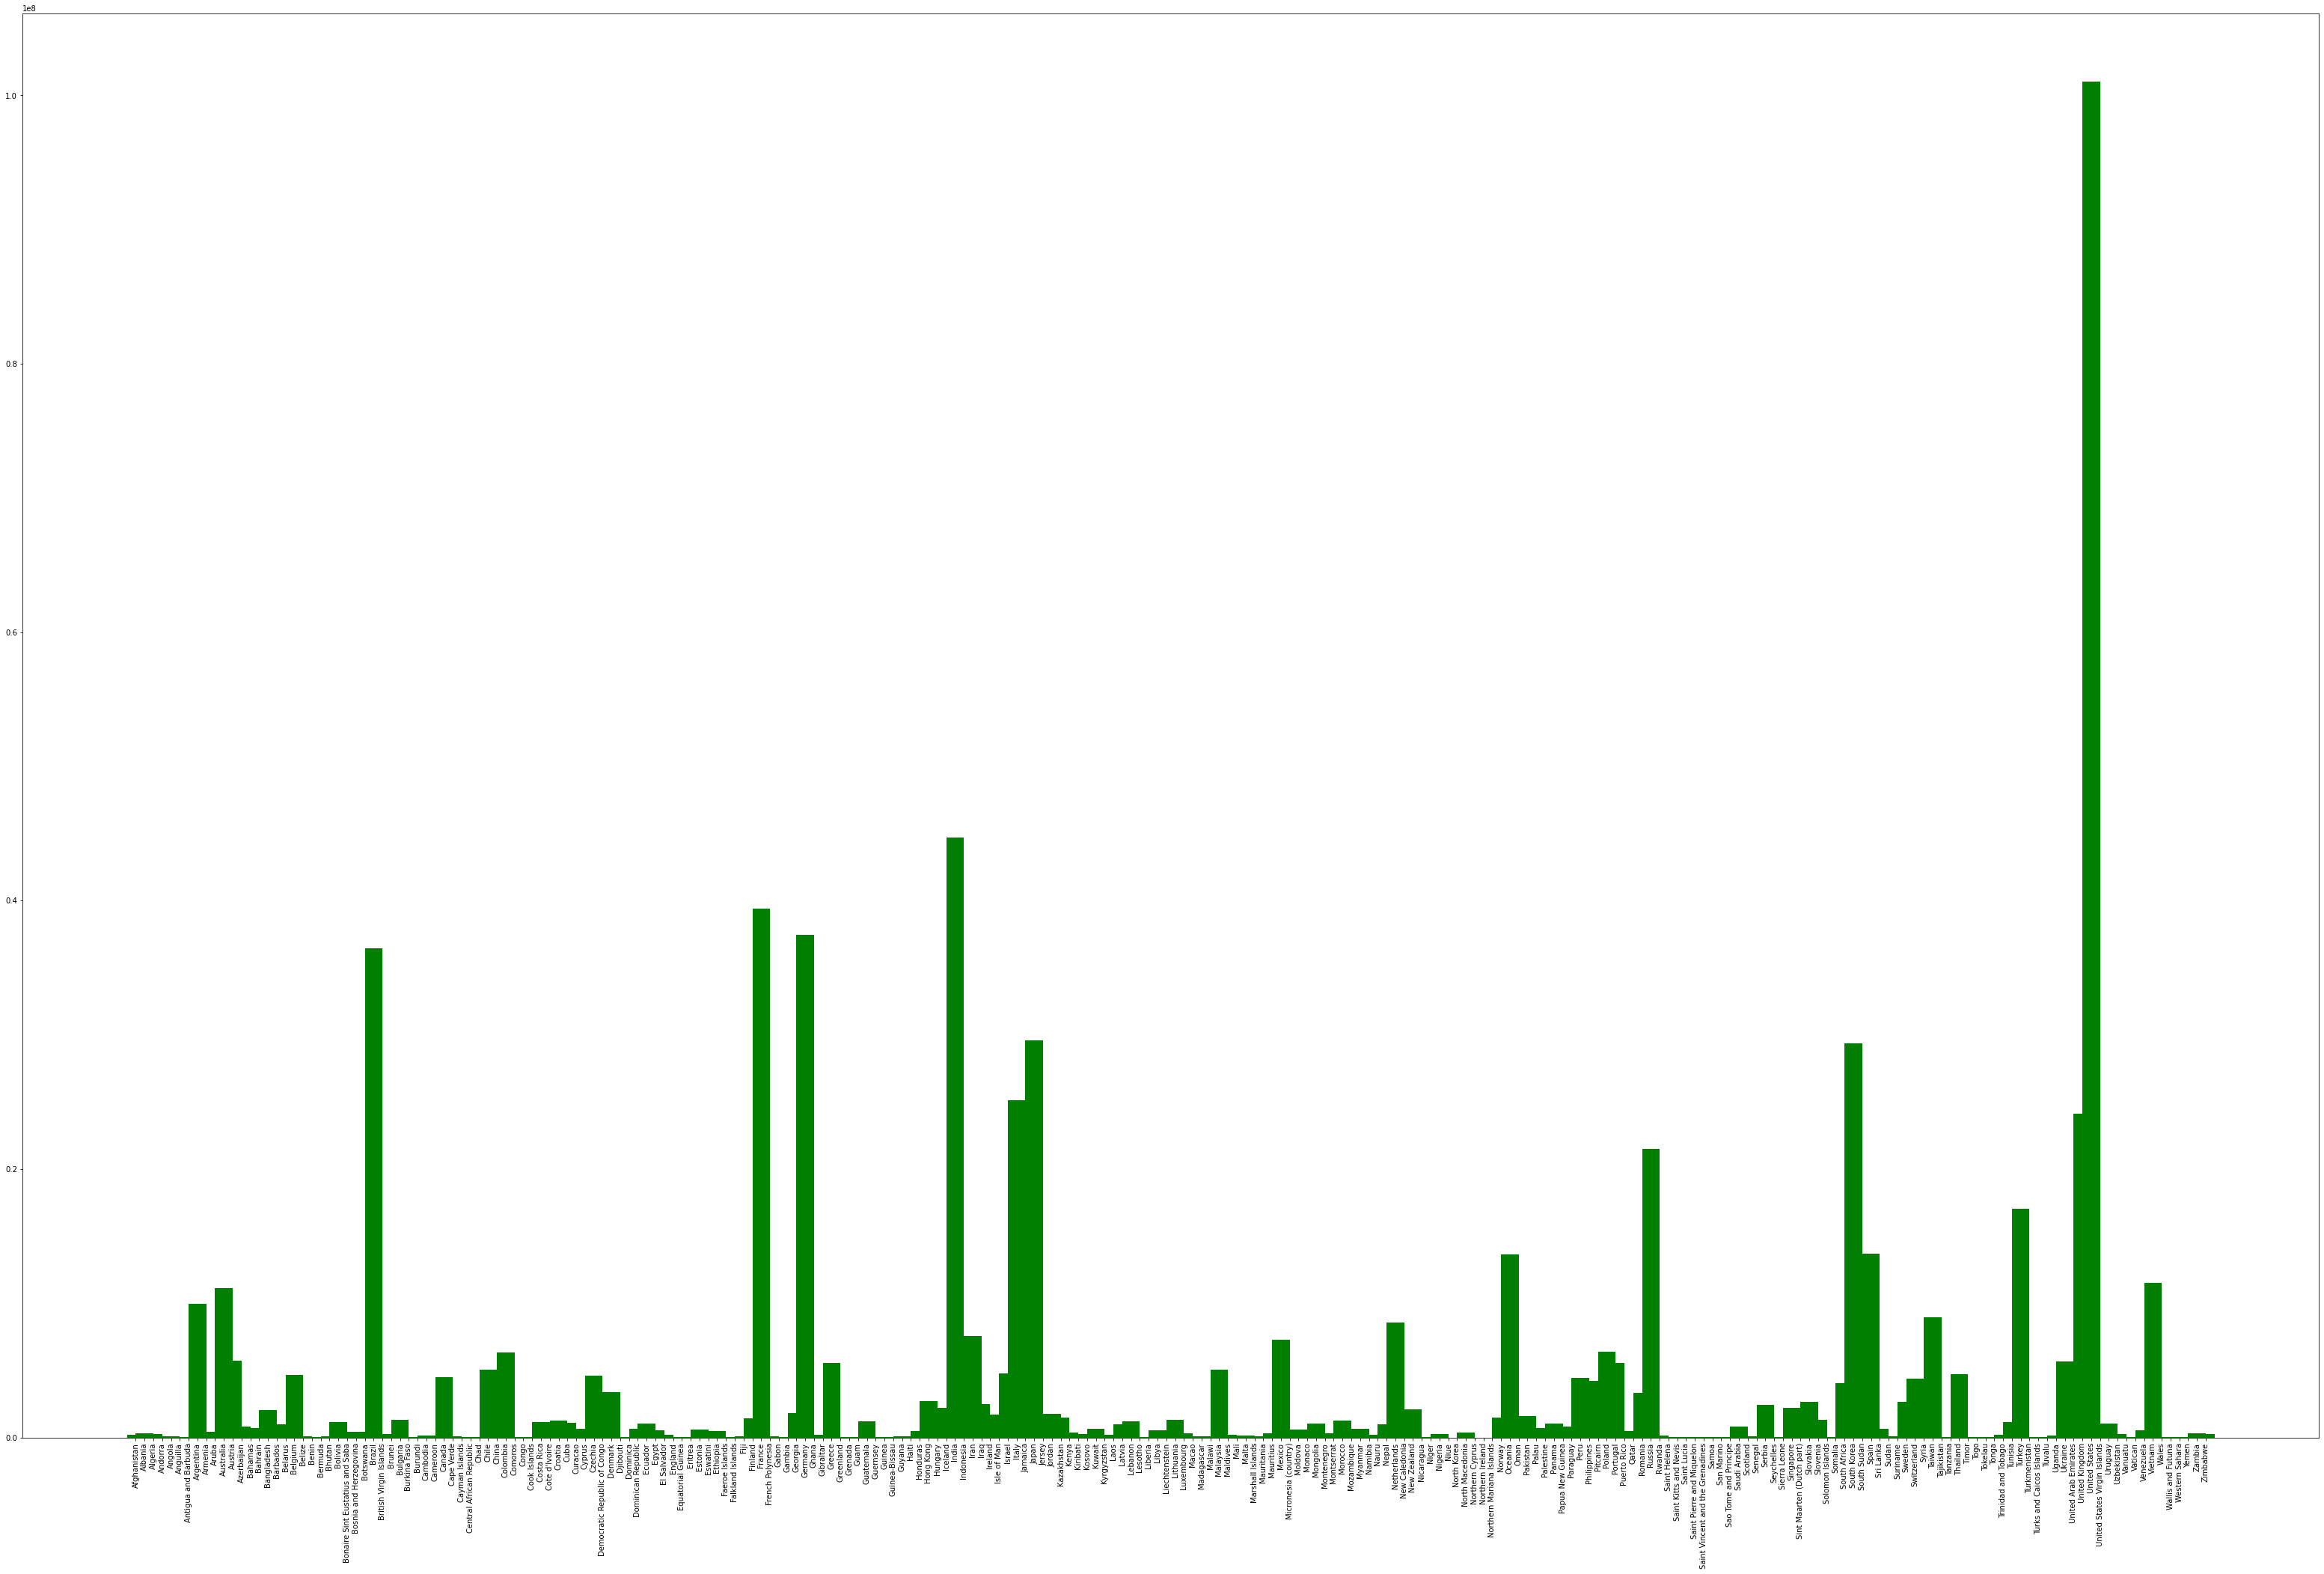

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(55,35))
plt.bar(Total_covid_cases.location,Total_covid_cases.total_cases,color='green',width=2)
plt.xticks(Total_covid_cases.location,rotation=90)
plt.show()
plt.savefig('Total_covid_cases_barplot.png')

In [30]:
Total_covid_cases= data.groupby('location').agg({'total_cases':max})
Total_covid_cases.reset_index(inplace=True)
Total_covid_cases1 = Total_covid_cases[Total_covid_cases['total_cases'] > 25000000]
Total_covid_cases1.sort_values(by=['total_cases'],ascending=False)

location  total_cases
222  United States  101044032.0
93           India   44680543.0
71          France   39410277.0
76         Germany   37475448.0
27          Brazil   36423138.0
102          Japan   29594073.0
195    South Korea   29363272.0
100          Italy   25143705.0

#### There are only 8 countries who has total covid cases more than 25 million. 
#### There is only one country which is United States who has covid cases more than 100 million.

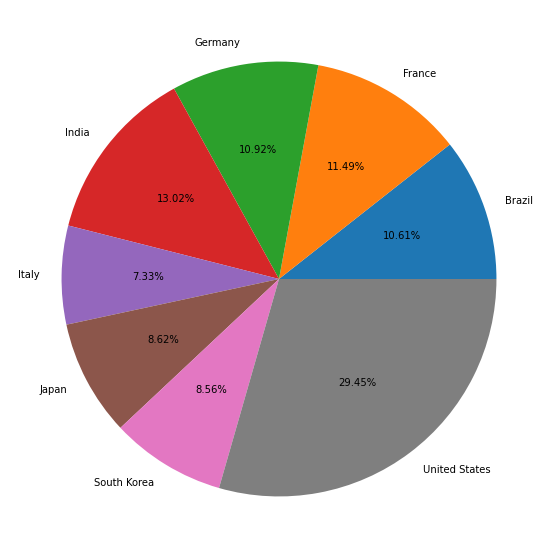

In [31]:
plt.figure(figsize=(20,10))
plt.pie(Total_covid_cases1.total_cases,labels= Total_covid_cases1.location,shadow=False,autopct='%1.2f%%')
plt.show()

#### Out of these 8 countries United States have maximum cases i.e 29.4% followed by India i.e.13%

In [32]:
Total_death = data.groupby('location').agg({'total_deaths':max})
Total_death.reset_index(inplace=True)
b=Total_death.sort_values(by=['total_deaths'],ascending=False)
b

location  total_deaths
222              United States     1095235.0
27                      Brazil      694411.0
93                       India      530710.0
172                     Russia      385971.0
130                     Mexico      331206.0
..                         ...           ...
166                   Pitcairn           0.0
169                Puerto Rico           0.0
174               Saint Helena           0.0
189  Sint Maarten (Dutch part)           0.0
68            Falkland Islands           0.0

[236 rows x 2 columns]

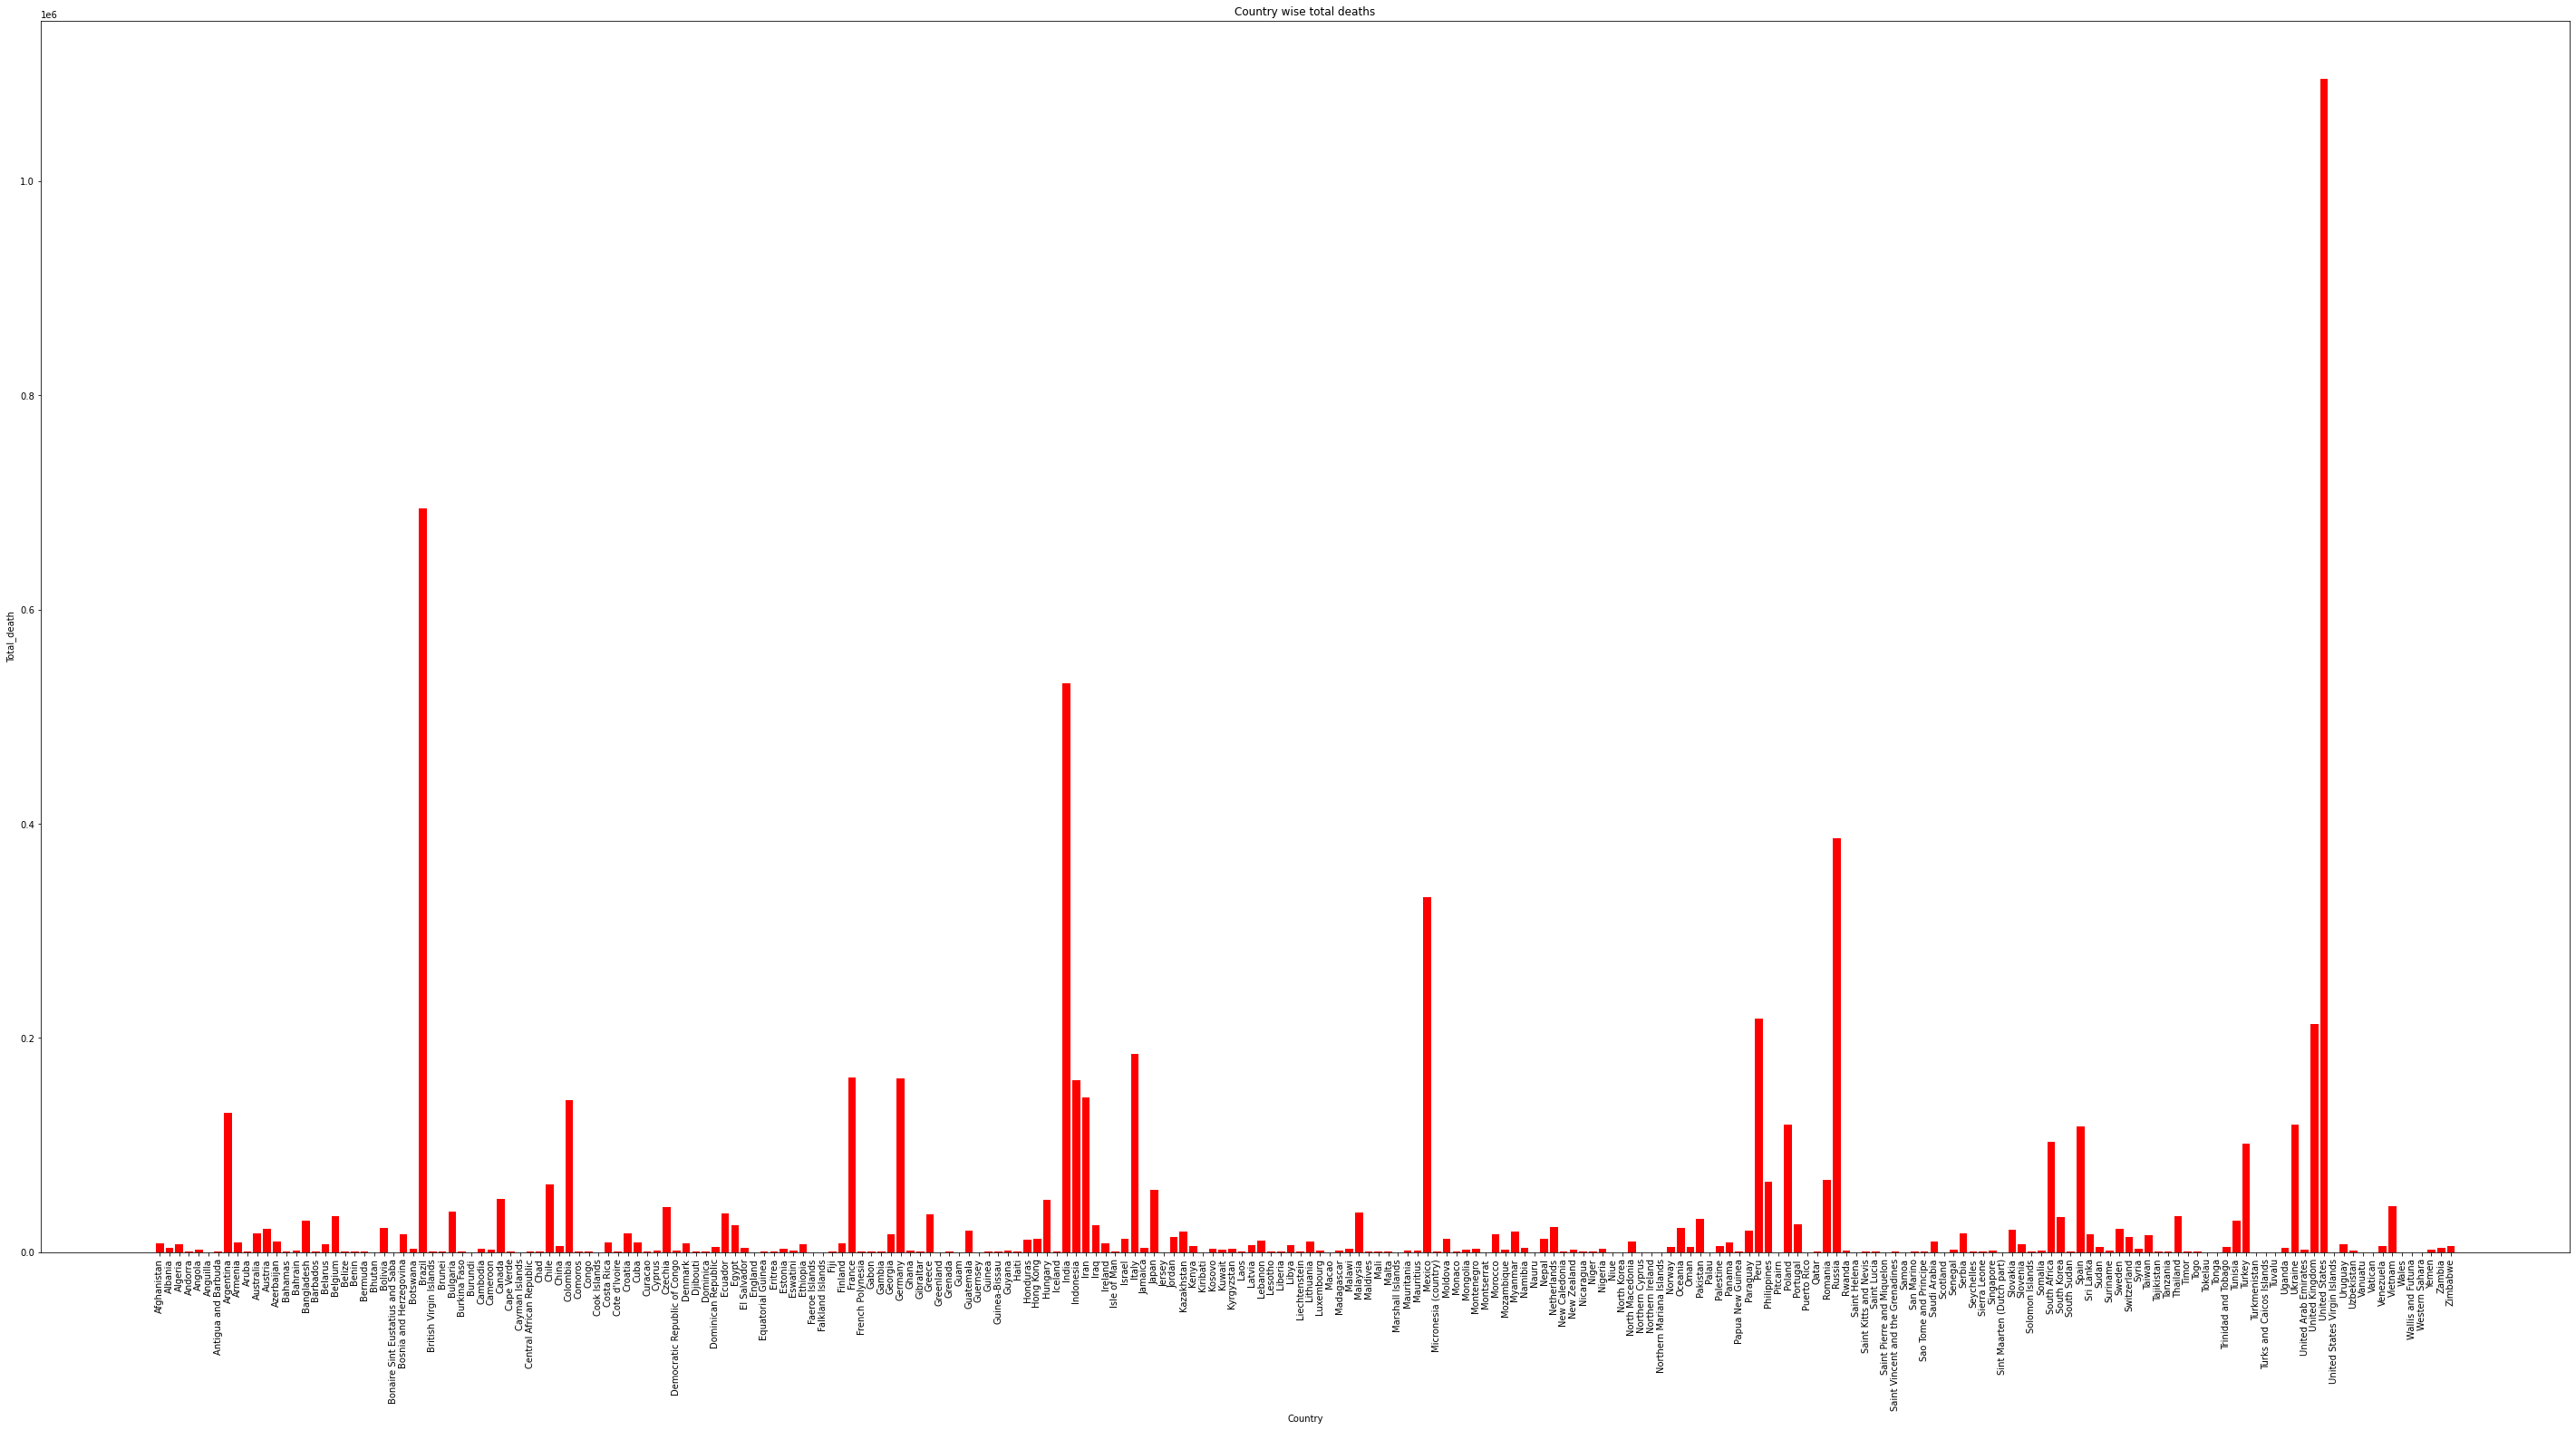

<Figure size 432x288 with 0 Axes>

In [33]:
plt.figure(figsize=(50,25))
plt.bar(Total_death.location, Total_death.total_deaths,color= 'red')
plt.xticks(Total_death.location,rotation=90)
plt.xlabel('Country')
plt.ylabel('Total_death')
plt.title('Country wise total deaths')
plt.show()
plt.savefig('Total_death_barplot.png')

In [34]:
Total_death1 = Total_death[Total_death.total_deaths > 300000]
Total_death1.sort_values(by=['total_deaths'],ascending=False)

location  total_deaths
222  United States     1095235.0
27          Brazil      694411.0
93           India      530710.0
172         Russia      385971.0
130         Mexico      331206.0

##### There are 5 countries whose death count is more than 300000.
##### United States have more than 1 million death count. 

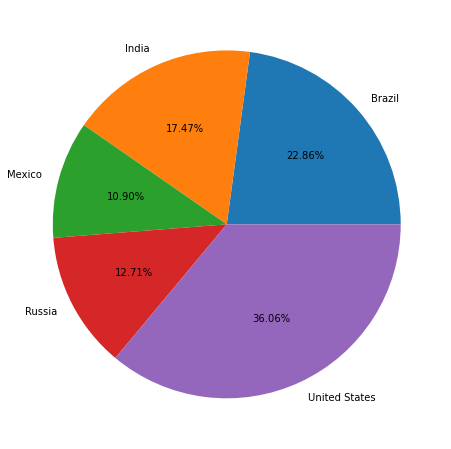

In [35]:
plt.figure(figsize=(12,8))
plt.pie(Total_death1.total_deaths, labels= Total_death1.location, autopct = '%1.2f%%', shadow=False )
plt.show()


#### Among all the 5 countries, United States has highest death count i.e. 36% followed by Brazil i.e.23%.


In [36]:
Total_population = data.groupby('location').agg({'population':max})
Total_population.reset_index(inplace=True)
Total_population

location  population
0          Afghanistan  41128772.0
1              Albania   2842318.0
2              Algeria  44903228.0
3              Andorra     79843.0
4               Angola  35588996.0
..                 ...         ...
231  Wallis and Futuna     11596.0
232     Western Sahara    576005.0
233              Yemen  33696612.0
234             Zambia  20017670.0
235           Zimbabwe  16320539.0

[236 rows x 2 columns]

In [37]:
Total_death_cases = pd.merge(Total_death,Total_covid_cases,on='location',how='outer')
Total_death_cases['percentage'] = (Total_death_cases.total_deaths/Total_death_cases.total_cases)*100
Total_death_cases. sort_values(by=['percentage'],ascending = False)
# Total_death_cases.describe()

location  total_deaths  total_cases  percentage
150                   North Korea           6.0          1.0  600.000000
233                         Yemen        2159.0      11945.0   18.074508
199                         Sudan        4994.0      63686.0    7.841598
203                         Syria        3163.0      57423.0    5.508246
193                       Somalia        1361.0      27310.0    4.983523
..                            ...           ...          ...         ...
210                       Tokelau           0.0          0.0         NaN
215                  Turkmenistan           0.0          0.0         NaN
223  United States Virgin Islands           0.0          0.0         NaN
230                         Wales           0.0          0.0         NaN
232                Western Sahara           0.0          0.0         NaN

[236 rows x 4 columns]

#### It seems North Korea has faulty data.

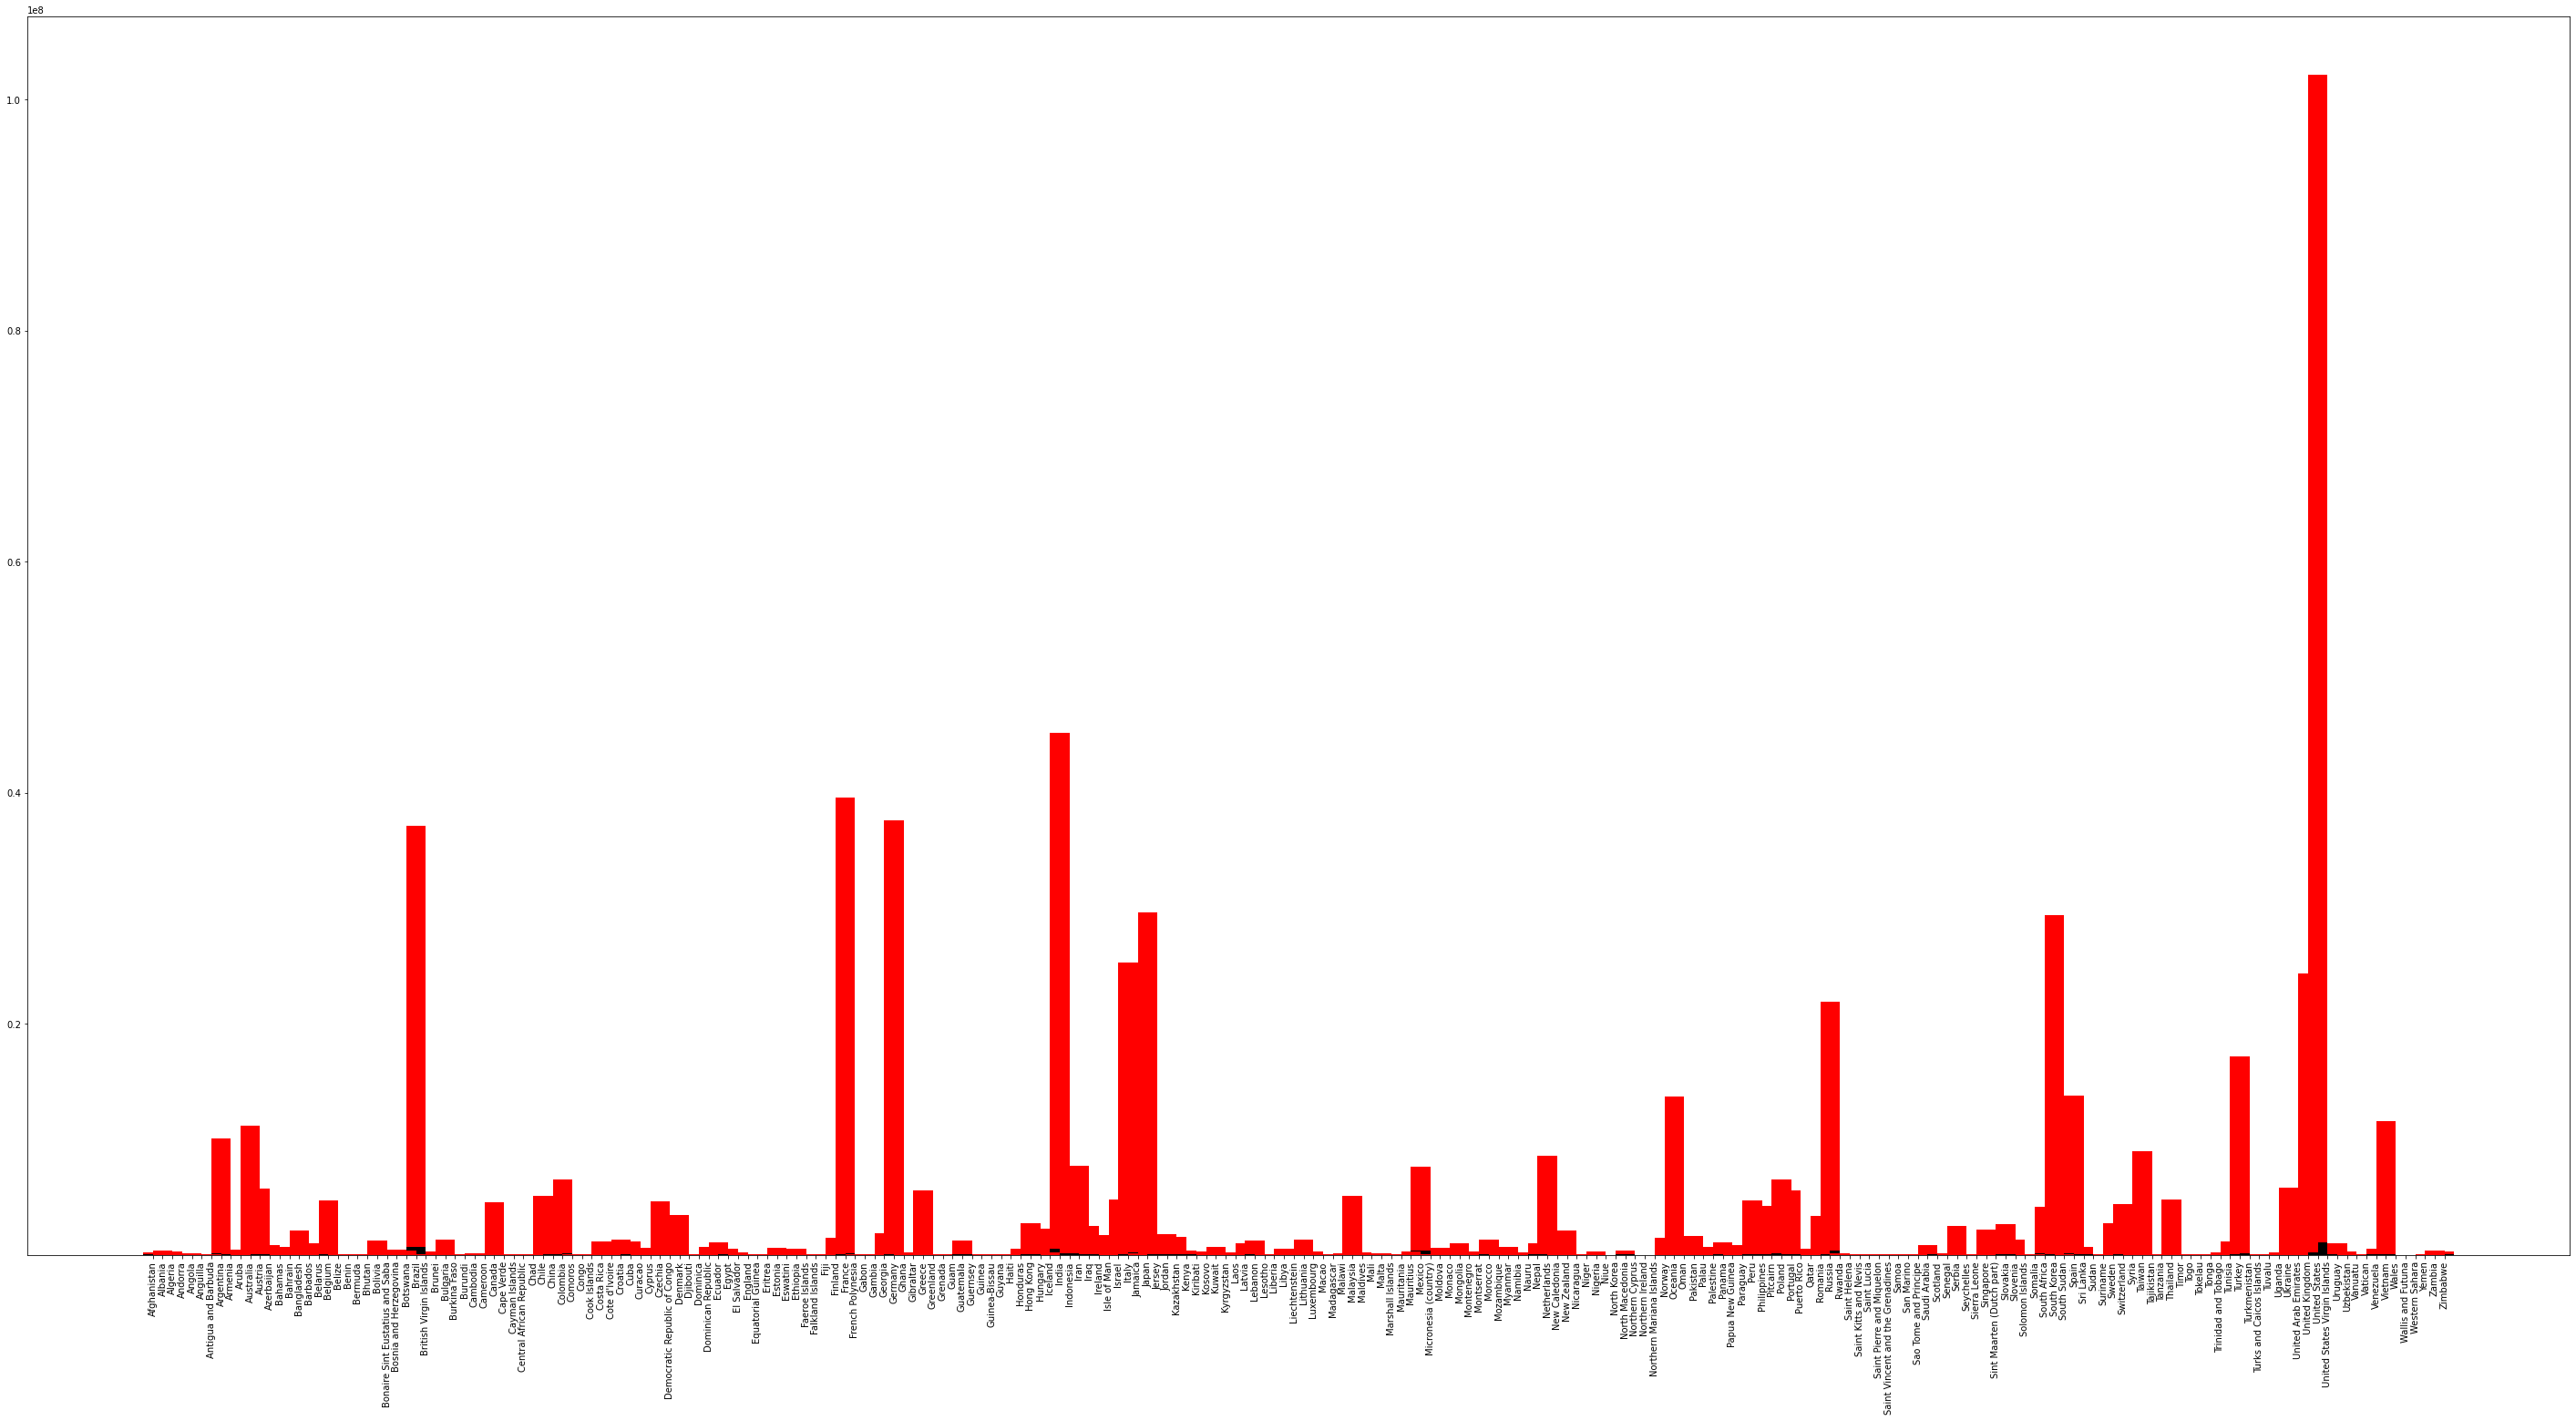

In [38]:
plt.figure(figsize=(50,25))
plt.bar(Total_death_cases.location,Total_death_cases.total_deaths,width=2,color='black')
plt.bar(Total_death_cases.location,Total_death_cases.total_cases,width=2,color='red',bottom=Total_death_cases.total_deaths)
plt.xticks(Total_death_cases.location,rotation=90)
plt.show()

In [39]:
Total_death_cases1= Total_death_cases[Total_death_cases.total_deaths > 500000]  
Total_death_cases1['percentage'] = (Total_death_cases.total_deaths/Total_death_cases.total_cases)*100
Total_death_cases1

location  total_deaths  total_cases  percentage
27          Brazil      694411.0   36423138.0    1.906511
93           India      530710.0   44680543.0    1.187788
222  United States     1095235.0  101044032.0    1.083919

#### Percentage of death compare to total cases is highest in Brazil followed by India & United States

<Figure size 1800x2520 with 0 Axes>

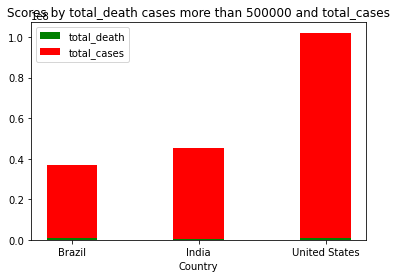

In [40]:
plt.figure(figsize=(25,35))
fig, ax = plt.subplots()

ax.bar(Total_death_cases1.location, Total_death_cases1.total_deaths, width=0.4,label='total_death',color='green')
ax.bar(Total_death_cases1.location,Total_death_cases1.total_cases, width=0.4, bottom=Total_death_cases1.total_deaths,
       label='total_cases',color='red')

ax.set_xlabel('Country')
ax.set_title('Scores by total_death cases more than 500000 and total_cases')
ax.legend()

plt.show()

#### Death rate is very less compare to total cases,  which is not more than 2%.

In [41]:
full_vaccination = data.groupby('location').agg({'people_fully_vaccinated' :max})
full_vaccination.reset_index(inplace=True)
full_vaccination

location  people_fully_vaccinated
0          Afghanistan               10754839.0
1              Albania                1270016.0
2              Algeria                6481186.0
3              Andorra                  53485.0
4               Angola                8253873.0
..                 ...                      ...
231  Wallis and Futuna                   6794.0
232     Western Sahara                      0.0
233              Yemen                 757050.0
234             Zambia                8555745.0
235           Zimbabwe                4751270.0

[236 rows x 2 columns]

In [42]:
fully_vaccinated_population = pd.merge(full_vaccination,Total_population,on='location',how='outer')
fully_vaccinated_population

location  people_fully_vaccinated  population
0          Afghanistan               10754839.0  41128772.0
1              Albania                1270016.0   2842318.0
2              Algeria                6481186.0  44903228.0
3              Andorra                  53485.0     79843.0
4               Angola                8253873.0  35588996.0
..                 ...                      ...         ...
231  Wallis and Futuna                   6794.0     11596.0
232     Western Sahara                      0.0    576005.0
233              Yemen                 757050.0  33696612.0
234             Zambia                8555745.0  20017670.0
235           Zimbabwe                4751270.0  16320539.0

[236 rows x 3 columns]

In [43]:
fully_vaccinated_population.describe()

people_fully_vaccinated    population
count             2.360000e+02  2.360000e+02
mean              2.176967e+07  3.427047e+07
std               1.061558e+08  1.361864e+08
min               0.000000e+00  4.700000e+01
25%               2.197315e+05  5.653270e+05
50%               2.332402e+06  5.608085e+06
75%               8.955004e+06  2.297867e+07
max               1.274018e+09  1.425887e+09

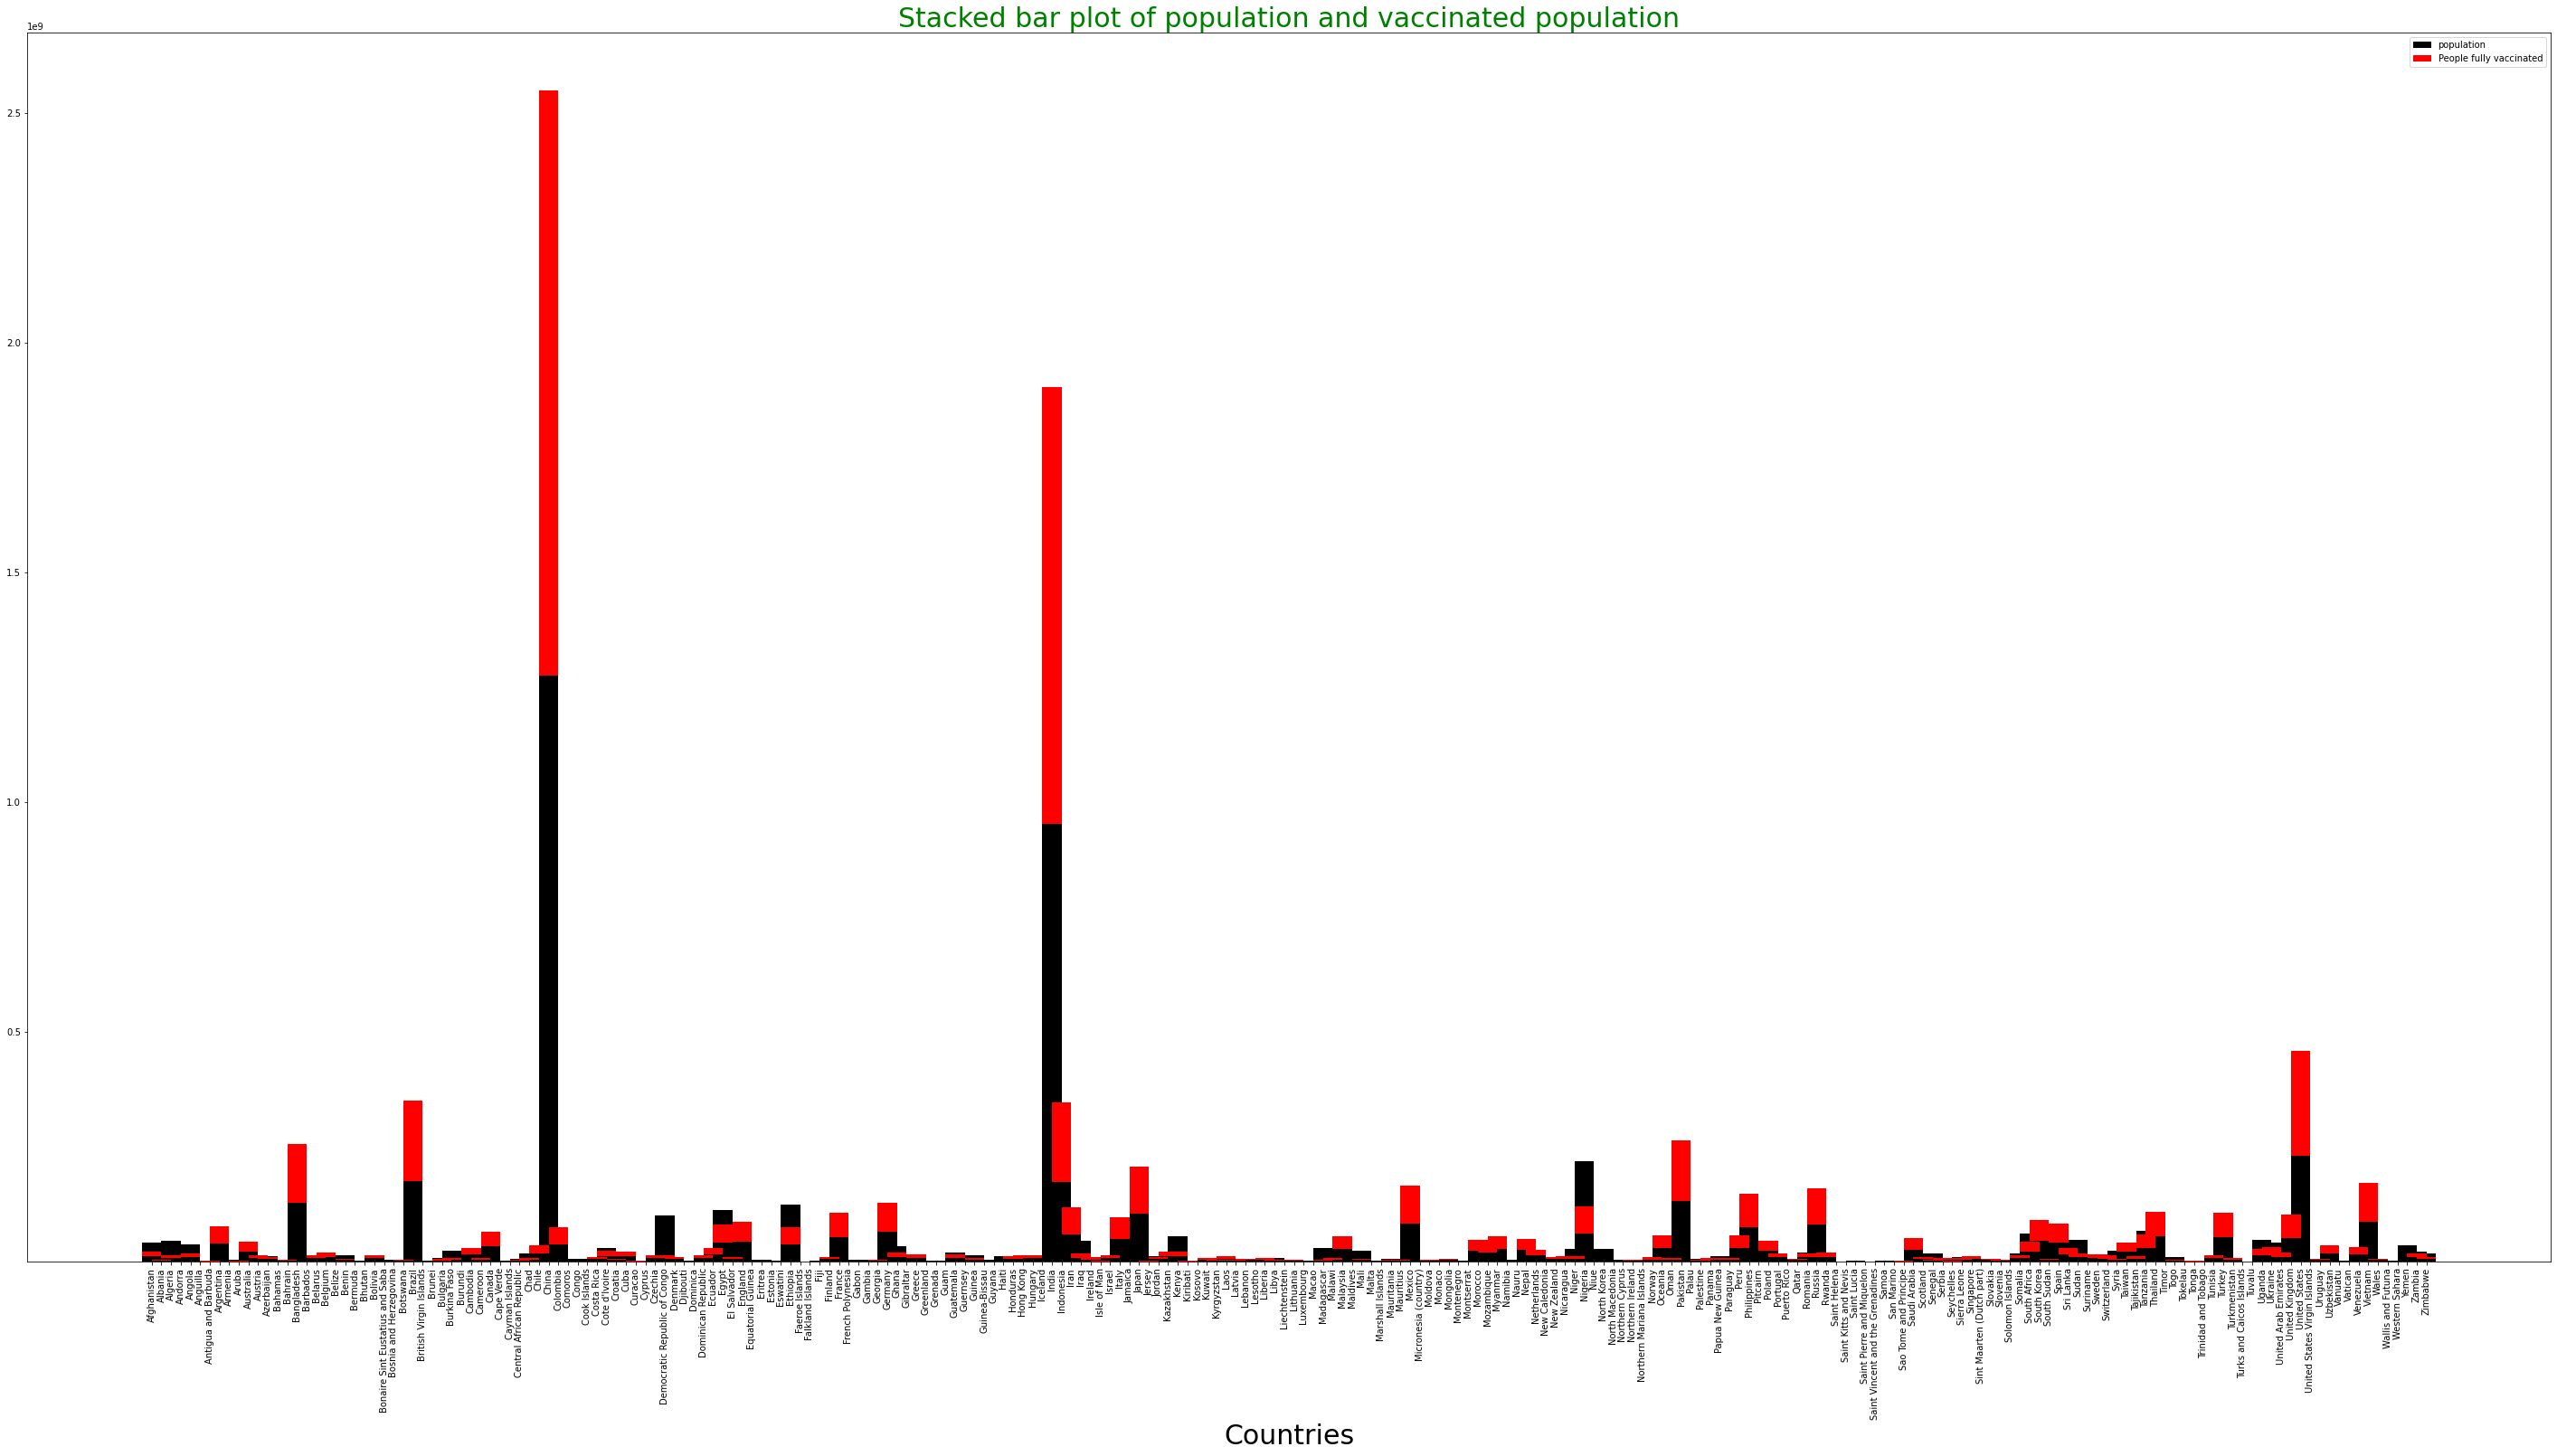

<Figure size 432x288 with 0 Axes>

In [44]:
plt.figure(figsize=(50,25))
plt.bar(fully_vaccinated_population.location,fully_vaccinated_population.population,width=2,color='black',label='population')
plt.bar(fully_vaccinated_population.location,fully_vaccinated_population.people_fully_vaccinated,width=2,color='red',
          bottom=fully_vaccinated_population.people_fully_vaccinated,label = 'People fully vaccinated')
plt.xticks(fully_vaccinated_population.location,rotation=90)
plt.xlabel('Countries',size=30)
plt.title('Stacked bar plot of population and vaccinated population',size=30,color='green')
plt.legend()
plt.show()
plt.savefig("Stacked bar plot of population and vaccinated population.png")

In [45]:
fully_vaccinated_population1 = fully_vaccinated_population[fully_vaccinated_population.people_fully_vaccinated>8.955004e+07]
fully_vaccinated_population1.sort_values(by=['people_fully_vaccinated','population'],ascending = False)

location  people_fully_vaccinated    population
41           China             1.274018e+09  1.425887e+09
93           India             9.512350e+08  1.417173e+09
222  United States             2.291352e+08  3.382899e+08
27          Brazil             1.749087e+08  2.153135e+08
94       Indonesia             1.725338e+08  2.755013e+08
158       Pakistan             1.313690e+08  2.358249e+08
15      Bangladesh             1.271823e+08  1.711864e+08
102          Japan             1.031385e+08  1.239517e+08

In [46]:
fully_vaccinated_population1['Percentage'] = (fully_vaccinated_population1.people_fully_vaccinated/fully_vaccinated_population.population)*100
fully_vaccinated_population1.sort_values(by='Percentage',ascending = False)

location  people_fully_vaccinated    population  Percentage
41           China             1.274018e+09  1.425887e+09   89.349133
102          Japan             1.031385e+08  1.239517e+08   83.208663
27          Brazil             1.749087e+08  2.153135e+08   81.234454
15      Bangladesh             1.271823e+08  1.711864e+08   74.294646
222  United States             2.291352e+08  3.382899e+08   67.733385
93           India             9.512350e+08  1.417173e+09   67.122002
94       Indonesia             1.725338e+08  2.755013e+08   62.625379
158       Pakistan             1.313690e+08  2.358249e+08   55.706159

####  There are only 8 countries where fully vaccinated people are more than 55%. 
#####  In China 89% of  people are fully vaccinated followed by Japan which is 83%

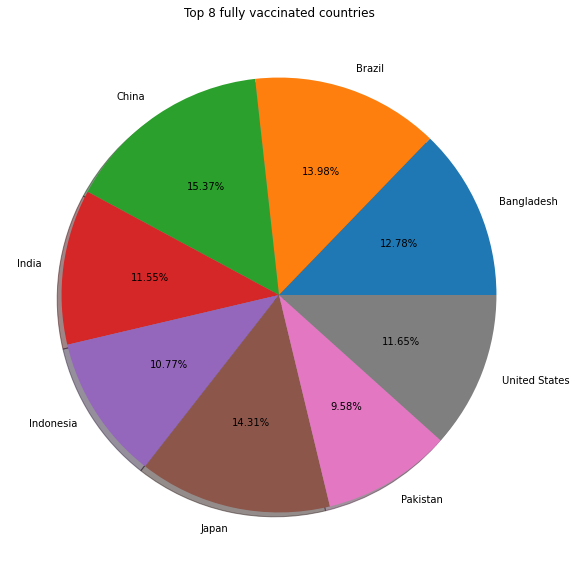

In [47]:
plt.figure(figsize=(10,10))
plt.pie(fully_vaccinated_population1.Percentage,labels = fully_vaccinated_population1.location,autopct ='%.2f%%',shadow = True)
plt.title('Top 8 fully vaccinated countries')
plt.show()

#### Out of these top 8 fully vaccinated countries China is on number one followed by Japan and Brazil.

<Figure size 1800x2520 with 0 Axes>

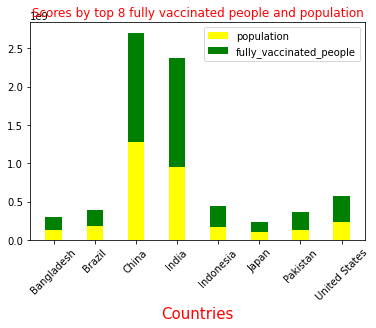

In [48]:
plt.figure(figsize=(25,35))
fig, ax = plt.subplots()

ax.bar(fully_vaccinated_population1.location, fully_vaccinated_population1.people_fully_vaccinated, width=0.4,label='population',color='yellow')
ax.bar(fully_vaccinated_population1.location,fully_vaccinated_population1.population, width=0.4, bottom=fully_vaccinated_population1.people_fully_vaccinated,
       label='fully_vaccinated_people',color='green')

ax.set_xlabel('Countries',size=15,color='red')
ax.set_title('Scores by top 8 fully vaccinated people and population',color='red')
ax.legend()
plt.xticks(fully_vaccinated_population1.location,rotation=45)
plt.show()

In [49]:
Total_cases_population = pd.merge(total_population,Total_covid_cases,on= 'location',how='outer')
Total_cases_population['percentage'] = (Total_cases_population.total_cases / Total_cases_population.population)*100
Total_cases_population.sort_values(by=['percentage'],ascending = False)

location  population  total_cases  percentage
51            Cyprus    896007.0     631111.0   70.435945
180       San Marino     33690.0      23176.0   68.791926
67    Faeroe Islands     53117.0      34658.0   65.248414
11           Austria   8939617.0    5716267.0   63.943086
78         Gibraltar     32677.0      20275.0   62.046700
..               ...         ...          ...         ...
82              Guam    171783.0          0.0    0.000000
149             Niue      1952.0          0.0    0.000000
152  Northern Cyprus    382836.0          0.0    0.000000
210          Tokelau      1893.0          0.0    0.000000
61           England  56550000.0          0.0    0.000000

[236 rows x 4 columns]

##### If we look at country population and total cases then Cyprus is on top where 70% people are infected by covid

In [50]:
Total_cases_population[Total_cases_population.percentage > 50.0].sort_values(by=['percentage'],ascending = False)

location  population  total_cases  percentage
51                      Cyprus    896007.0     631111.0   70.435945
180                 San Marino     33690.0      23176.0   68.791926
67              Faeroe Islands     53117.0      34658.0   65.248414
11                     Austria   8939617.0    5716267.0   63.943086
78                   Gibraltar     32677.0      20275.0   62.046700
191                   Slovenia   2119843.0    1310419.0   61.816795
3                      Andorra     79843.0      47751.0   59.806120
29                      Brunei    449002.0     266819.0   59.424902
71                      France  67813000.0   39410277.0   58.116109
54                     Denmark   5882259.0    3392457.0   57.672690
177  Saint Pierre and Miquelon      5885.0       3349.0   56.907392
195                South Korea  51815808.0   29363272.0   56.668560
92                     Iceland    372903.0     208298.0   55.858494
168                   Portugal  10270857.0    5557941.0   54.113702
117              Liechtenstein     39355.0      21296.0   54.112565
79                      Greece  10384972.0    5548487.0   53.428040
112                     Latvia   1850654.0     974309.0   52.646740
68            Falkland Islands      3801.0       1930.0   50.776112
99                      Israel   9449000.0    4767996.0   50.460324
202                Switzerland   8740471.0    4399516.0   50.334999

In [51]:
Total_cases_population[Total_cases_population.percentage > 50.0].sort_values(by=['percentage'],ascending = False).shape

(20, 4)

In [52]:
Total_cases_population[Total_cases_population.percentage > 50.0].sort_values(by=['percentage'],
                                                                             ascending = False).location.unique()

array(['Cyprus', 'San Marino', 'Faeroe Islands', 'Austria', 'Gibraltar',
       'Slovenia', 'Andorra', 'Brunei', 'France', 'Denmark',
       'Saint Pierre and Miquelon', 'South Korea', 'Iceland', 'Portugal',
       'Liechtenstein', 'Greece', 'Latvia', 'Falkland Islands', 'Israel',
       'Switzerland'], dtype=object)

#### There are 20 countries where  50% of population has been infected to covid.

In [53]:
total_booster = data.groupby('location').agg({'total_boosters':max})
total_booster.reset_index(inplace=True)
total_booster

location  total_boosters
0          Afghanistan             0.0
1              Albania        377057.0
2              Algeria        575651.0
3              Andorra         42981.0
4               Angola       1457126.0
..                 ...             ...
231  Wallis and Futuna          3742.0
232     Western Sahara             0.0
233              Yemen         59240.0
234             Zambia         33684.0
235           Zimbabwe       1033676.0

[236 rows x 2 columns]

In [54]:
no_booster = total_booster[total_booster.total_boosters == 0.0]
no_booster.location

0                          Afghanistan
9                                Aruba
20                               Benin
24     Bonaire Sint Eustatius and Saba
31                        Burkina Faso
39                                Chad
43                             Comoros
44                               Congo
53        Democratic Republic of Congo
55                            Djibouti
63                             Eritrea
68                    Falkland Islands
80                           Greenland
82                                Guam
88                               Haiti
110                         Kyrgyzstan
111                               Laos
125                               Mali
127                   Marshall Islands
131               Micronesia (country)
146                          Nicaragua
147                              Niger
150                        North Korea
154           Northern Mariana Islands
159                              Palau
169                      

In [55]:
total_booster[total_booster.total_boosters == 0.0].location.shape

(34,)

##### There are 34 countries where no booster dose has been taken.

In [56]:
booster_taken = total_booster[total_booster.total_boosters != 0.0].sort_values(by=['total_boosters'], ascending=False)
booster_taken

location  total_boosters
41           China     815718000.0
93           India     222704735.0
102          Japan     163710513.0
222  United States     132475694.0
27          Brazil     122692958.0
..             ...             ...
36      Cape Verde           749.0
86   Guinea-Bissau           745.0
136     Montserrat           563.0
32         Burundi           283.0
166       Pitcairn            23.0

[202 rows x 2 columns]

#### There are 202 contries where booster dose has been registered. Chine has taken the most booster dose than all other countries.

In [57]:
df[df.reproduction_rate == 0.0].location

5                             Anguilla
9                                Aruba
21                             Bermuda
24     Bonaire Sint Eustatius and Saba
28              British Virgin Islands
37                      Cayman Islands
45                        Cook Islands
50                             Curacao
61                             England
67                      Faeroe Islands
68                    Falkland Islands
72                    French Polynesia
78                           Gibraltar
80                           Greenland
82                                Guam
84                            Guernsey
90                           Hong Kong
98                         Isle of Man
103                             Jersey
120                              Macao
136                         Montserrat
144                      New Caledonia
149                               Niue
150                        North Korea
152                    Northern Cyprus
153                   Nor

In [58]:
df[df.reproduction_rate == 0.0].location.shape

(42,)

##### There are 42 countries where reproduction rate was zero in covid.

In [59]:
vaccine_ratio = df[df.vaccination_ratio !=0.00]
vaccine_ratio.sort_values(by = ['vaccination_ratio'],ascending = False)

location       date  total_cases  new_cases  \
78              Gibraltar 2023-01-04      20275.0      327.0   
210               Tokelau 2022-12-05          0.0        0.0   
220  United Arab Emirates 2023-01-04    1047209.0     4471.0   
170                 Qatar 2023-01-04     490147.0     4206.0   
179                 Samoa 2023-01-04      15982.0     1166.0   
..                    ...        ...          ...        ...   
121            Madagascar 2023-01-04      67750.0     2295.0   
162      Papua New Guinea 2023-01-04      46663.0     1543.0   
88                  Haiti 2023-01-04      33904.0      284.0   
233                 Yemen 2023-01-04      11945.0      287.0   
32                Burundi 2023-01-04      52051.0     4710.0   

     new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
78              152.857         110.0         9.0                4.857   
210               0.000           0.0         0.0                0.000   
220            3755.000        2348.0        20.0               16.143   
170            4101.571         685.0        10.0                7.429   
179             386.000          29.0         4.0                1.000   
..                  ...           ...         ...                  ...   
121             633.857        1418.0        54.0               12.857   
162             512.286         669.0        48.0               15.143   
88              191.429         860.0        12.0                5.857   
233             109.429        2159.0        60.0               16.429   
32             1162.000          38.0        29.0                4.286   

     reproduction_rate  total_vaccinations  people_vaccinated  \
78                0.00            132810.0            42175.0   
210               0.00              5374.0             2203.0   
220               2.71          24922054.0          9991089.0   
170               2.78           7601367.0          2850159.0   
179               1.71            526775.0           231546.0   
..                 ...                 ...                ...   
121               1.57           2379808.0          2056662.0   
162               1.37            711981.0           369998.0   
88                1.51            510611.0           398517.0   
233               1.81           1238962.0          1003208.0   
32                1.22             30480.0            28541.0   

     people_fully_vaccinated  total_boosters  population  vaccination_ratio  \
78                   41465.0         49170.0     32677.0         129.066316   
210                   2203.0           968.0      1893.0         116.376123   
220                9792266.0       5138699.0   9441138.0         105.825050   
170                2850158.0       1901050.0   2695131.0         105.752151   
179                 215077.0         79061.0    222390.0         104.117092   
..                       ...             ...         ...                ...   
121                1981152.0        108396.0  29611718.0           6.945433   
162                 309599.0         32384.0  10142625.0           3.647951   
88                  237406.0             0.0  11585003.0           3.439939   
233                 757050.0         59240.0  33696612.0           2.977178   
32                   27957.0           283.0  12889583.0           0.221427   

     prevalence  incidence  
78    62.046700   2.506900  
210    0.000000   0.000000  
220   11.091979   0.050536  
170   18.186389   0.174362  
179    7.186474   0.544761  
..          ...        ...  
121    0.228795   0.007763  
162    0.460068   0.015278  
88     0.292654   0.002452  
233    0.035449   0.000852  
32     0.403822   0.036632  

[224 rows x 17 columns]

#### There are 224 countries where vaccination rate are greater than 0. Gibraltar have highest vaccination ratio.

In [4]:

colors = ["#F9F9F5", "#FAFAE6", "#FCFCCB", "#FCFCAE",  "#FCF1AE", "#FCEA7D", "#FCD97D",
          "#FCCE7D", "#FCC07D", "#FEB562", "#F9A648",  "#F98E48", "#FD8739", "#FE7519",
          "#FE5E19", "#FA520A", "#FA2B0A", "#9B1803",  "#861604", "#651104", "#570303",]


fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = df['location'],
    z = df['total_cases'],
    text = df['population'],
    colorscale = colors,
    autocolorscale=False,
    reversescale=False,
    colorbar_title = ' Reported Covid-19 Cases',
))

fig.update_layout(title_text='Country wise Reported Covid-19 Cases',geo=dict(showcoastlines=True,))


#### Summary

1. The data includes the COVID details of 236 countries.
2. The North Korea had total deaths more than total number of case, which is quite impossible. (600%)

Covid Cases

3. There are 17 countries among 236 which had not a single COVID case.
4. 8 countries among 236 had COVID cases more than 25Million. US being the highest with more than 100Million cases. India being second with 44Million cases.
5. Cyprus is the country with most COVID cases when compared to individual population of that country. (896007 population with     631111 COVID cases.  i.e 70% population was infected)
6. Similarly there are 20 countries in total with more than 50% infected population.

Death

7. 5 countries had death rate more than 0.3Million. Again US being on top with death rate more than 1Million.
8. Brazil had the highest death rate when counted against total number of cases. (1.9%)
9. Total deaths are about 2% of total worlds population. 
10. There are 42 countries where reproduction rate was zero during COVID infections.

Vaccination.

11. There are total 8 countries with more than 55% vaccinated population . China being on top with 89% vaccinated population . 
12. There are 34 countries where no one took the booster dose.
13. Gibraltar has highest vaccination rate.
14. There are 12 countries in total where no one was vaccinated.